## Clustering Planare Winkel

In [1]:
from config import *
raw_df = load_data('_cleaned_L2_final')
agg_all = load_agg_df()

Zum Clustering wir die Funktion `cluster.clustering.do_cluster` verwendet, die viele optionale Parameter besitzt. Wir setzen hier:

In [2]:
kwargs = {}  # Parameter dict with entry for each loop_type

for way in range(3, 12):
    kwargs[way] = (dict(
        data=load_agg_df(way=way), # Aggregierte Multiloops
        features=[f'planar_{i}_median' for i in range(1, way+1)],  # Median
        n_clusters=(75, ),         # Clustering is done separately for each int
        dim=way,                   # Cluster in all dimensions of loop_type
        alg="agglomerative",       # agglomerative|k_means|meanshift|spectral
        scaler=None,               # None|MinMax|Standard -> for angles None
        s=2,                       # Marker size for plots
        save=False,                # Whether to save result plots
        legend=True,               # Whether to draw legend
    ))

75 Cluster zeigte für alle Looptypen ordentliche Ergebnisse. Da wir ohnehin nachselektieren müssen ist die genaue Zahl hier aber nicht zu entscheidend.

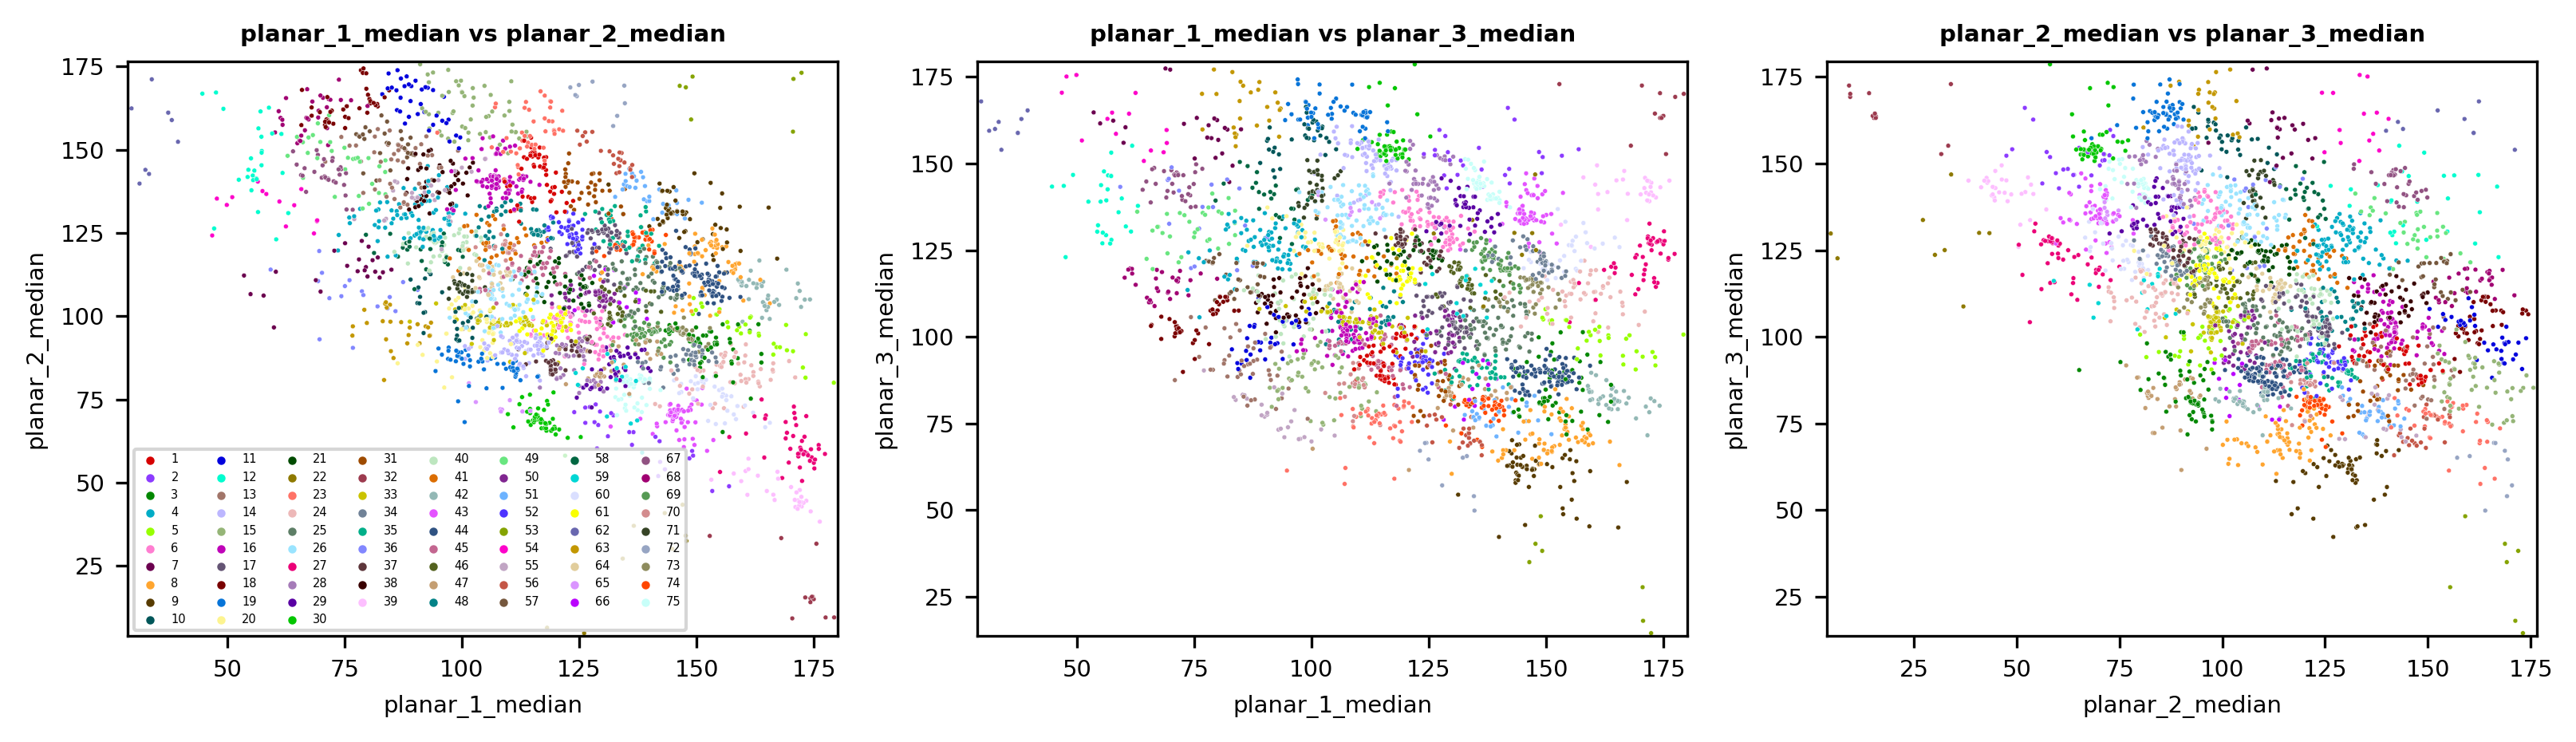

In [3]:
cluster3 = do_cluster(**kwargs[3])[0]